In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

file_path = '/content/Top 2000 Companies Financial Data 2024.csv'
df = pd.read_csv(file_path)

df.head()

,Unnamed: 0,Name,Country,Sales,Profit,Assets,Market Value
0,0,JPMorganChase,United States,$252.9 B,$50 B,"$4,090.7 B",$588.1 B
1,1,Berkshire Hathaway,United States,$369 B,$73.4 B,"$1,070 B",$899.1 B
2,2,Saudi Arabian Oil Company (Saudi Aramco),Saudi Arabia,$489.1 B,$116.9 B,$661.5 B,"$1,919.3 B"
3,3,ICBC,China,$223.8 B,$50.4 B,"$6,586 B",$215.2 B
4,4,Bank of America,United States,$183.3 B,$25 B,"$3,273.8 B",$307.3 B


In [17]:
# Drop the index column by its integer location if it doesn't have a name
# Check if 'Unnamed: 0' exists in the columns
if 'Unnamed: 0' in df.columns:
    df.drop(columns=['Unnamed: 0'], inplace=True)
else:
    # If 'Unnamed: 0' doesn't exist, try dropping the first column (index 0)
    df.drop(df.columns[0], axis=1, inplace=True)

# Convert financial columns to numeric, removing any non-numeric characters
financial_columns = ['Sales', 'Profit', 'Assets', 'Market Value']
for column in financial_columns:
    df[column] = df[column].replace({'\$': '', ',': '', ' B': 'e9', ' M': 'e6'}, regex=True).astype(float)

# Check for missing values
df.isnull().sum()

,0
Sales,0
Profit,0
Assets,0
Market Value,0


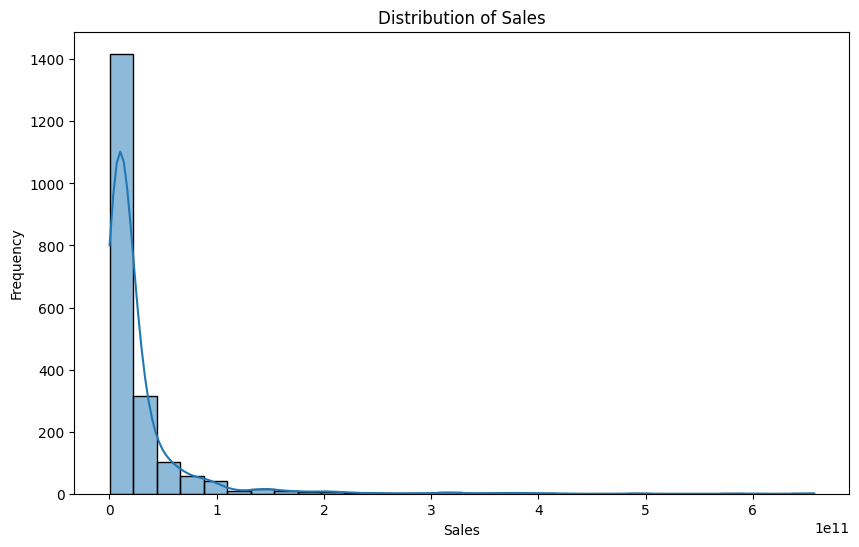

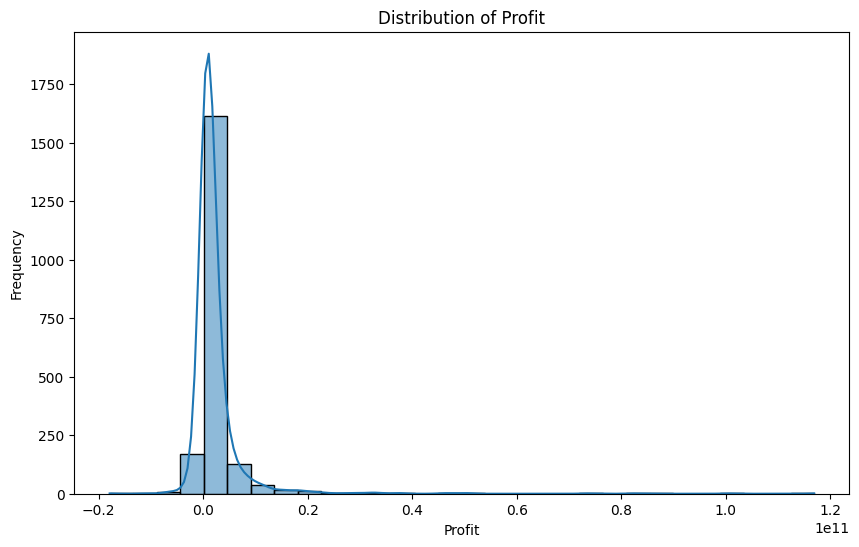

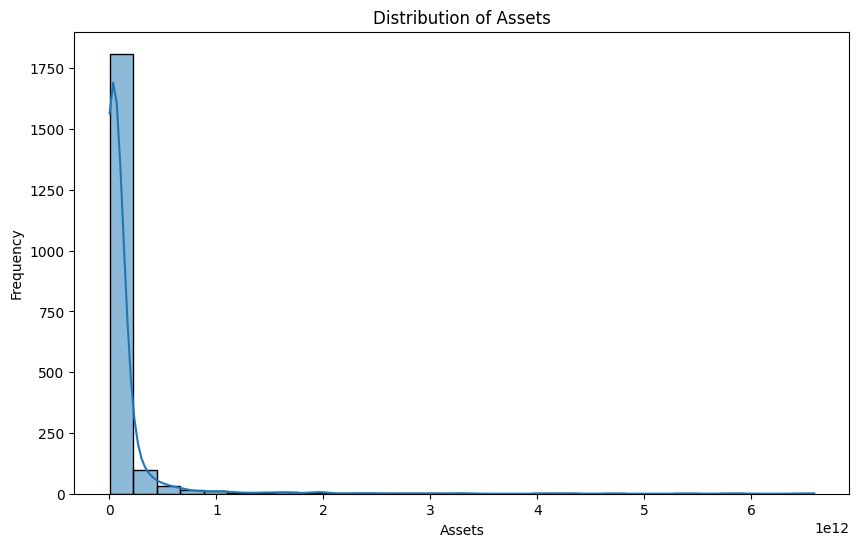

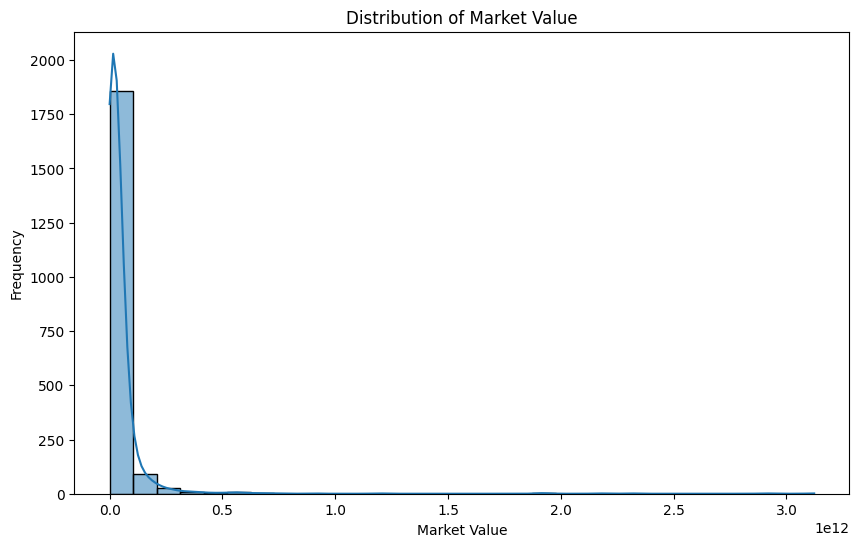

In [14]:
for column in financial_columns:
  plt.figure(figsize=(10, 6))
  sns.histplot(df[column], bins=30, kde=True)
  plt.title(f'Distribution of {column}')
  plt.xlabel(column)
  plt.ylabel('Frequency')
  plt.show()

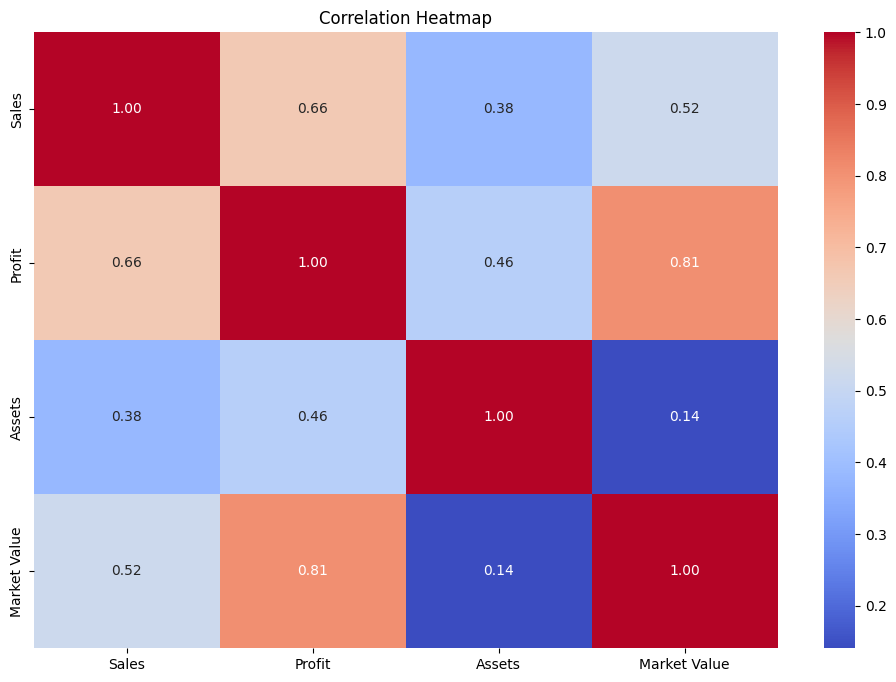

In [15]:
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(12,8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()